In [2]:
import h5py as h5
import numpy as np


In [11]:
# open the file using h5py
fname = '/global/cfs/cdirs/lsst/www/shivamp/AR_NPE/Bias_Challenge/data/training/data.hdf5'
df = h5.File(fname, 'r')
# Take all the counts from the file for one realization
counts_bin_0 = df['aquila_bias_challenge_training_0']['res_2']['counts_bin_0'][()]
counts_bin_1 = df['aquila_bias_challenge_training_0']['res_2']['counts_bin_1'][()]
counts_bin_2 = df['aquila_bias_challenge_training_0']['res_2']['counts_bin_2'][()]
counts_bin_3 = df['aquila_bias_challenge_training_0']['res_2']['counts_bin_3'][()]
counts_bin_4 = df['aquila_bias_challenge_training_0']['res_2']['counts_bin_4'][()]
counts_bin_5 = df['aquila_bias_challenge_training_0']['res_2']['counts_bin_5'][()]

# These correspond to six bins:
lgmass_bins = (0.5*(np.linspace(12, 15, 7)[1:] + np.linspace(12, 15, 7)[:-1]))


In [ ]:
# counts_bin_0 corresponds to the counts in the first bin, counts_bin_1 in the second and so on...
# Now we take the 

# counts_bin_0



In [ ]:
from nbodykit.source.catalog.file import BigFileCatalog
from nbodykit.source.mesh import BigFileMesh
from nbodykit.lab import FFTPower, HaloCatalog





In [1]:
import numpy as np
import sys,os
import readgadget
import MAS_library as MASL

# This routine computes the density field and save results to file
def compute_df(snapshot, ptypes, grid, fout):
    # if not(os.path.exists(snapshot+'.0')) and not(os.path.exists(snapshot+'.0.hdf5')):
        # return 0
    print(snapshot)
    df = MASL.density_field_gadget(snapshot, ptypes, grid, MAS='CIC',
                                   do_RSD=False, axis=0, verbose=True)
    df = df/np.mean(df, dtype=np.float64)-1.0
    np.save(fout, df)
    
    
    

In [2]:
# %pip install Pylians
root         = '/pscratch/sd/s/spandey/quijote/Snapshot_fid'
root_out     = '/pscratch/sd/s/spandey/quijote/Snapshot_fid/Snapshot_fid_density'
ptypes       = [1]
snapnum      = 0
grid         = 128
# numbers = np.arange(0,17)
# for i in numbers:
i = 0
print(i)
# for snapnum in [0,1,2,3,4]:
snapnum = 4
print(snapnum)
# find the redshift
z = {4:0, 3:0.5, 2:1, 1:2, 0:3}[snapnum]

# create output folder if it does not exists
folder_out = '%s/%d'%(root_out,i)
if not(os.path.exists(folder_out)):
    os.system('mkdir %s'%folder_out)

# find name of output file
fout = '%s/df_m_%d_z=%s.npy'%(folder_out,grid,z)
# if os.path.exists(fout):  continue

# compute the density field and save it to file
snapshot = '%s/%d/snapdir_%03d/snap_%03d'%(root,i,snapnum,snapnum)
df = MASL.density_field_gadget(snapshot, ptypes, grid, MAS='CIC',
                               do_RSD=False, axis=0, verbose=True)
df_pylians = df/np.mean(df, dtype=np.float64)-1.0

# compute_df(snapshot, ptypes, grid, fout)



0
4

Computing density field of particles [1]
1.34217728e+08 should be equal to
1.34217728e+08
Time taken = 2.81 seconds


In [29]:
df_nbkit = {}
pos_all = readgadget.read_field(snapshot, "POS ", ptypes[0])
df_nbkit['Position'] = pos_all/1e3
# np.vstack((df_samp['x_samp_all'], df_samp['y_samp_all'], df_samp['z_samp_all'])).T.shape
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
df_nbkit = cat.to_mesh(window='cic', Nmesh=grid, compensated=False, position='Position')
`
# df_nbkit.value.shape
one_plus_delta_nbkit = df_nbkit.paint(mode='real')




/tmp/ipykernel_52243/3737184818.py:7: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  df_nbkit = cat.to_mesh(window='cic', Nmesh=grid, compensated=True, position='Position')


In [28]:
np.amax(pos_all/1e3)


999.99994

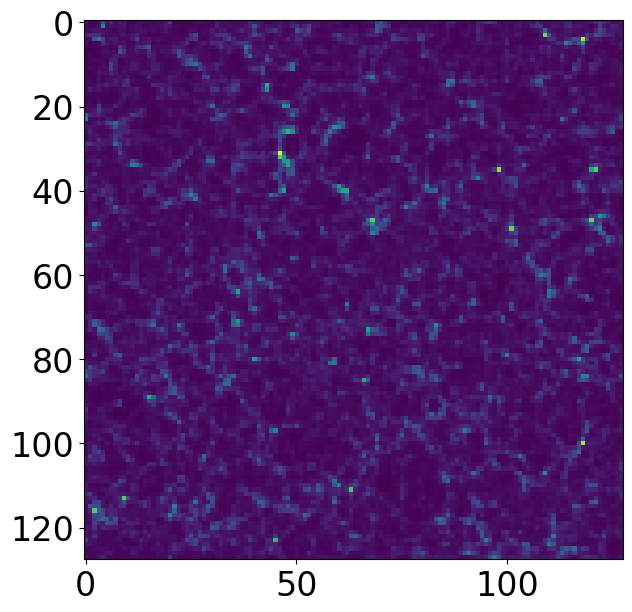

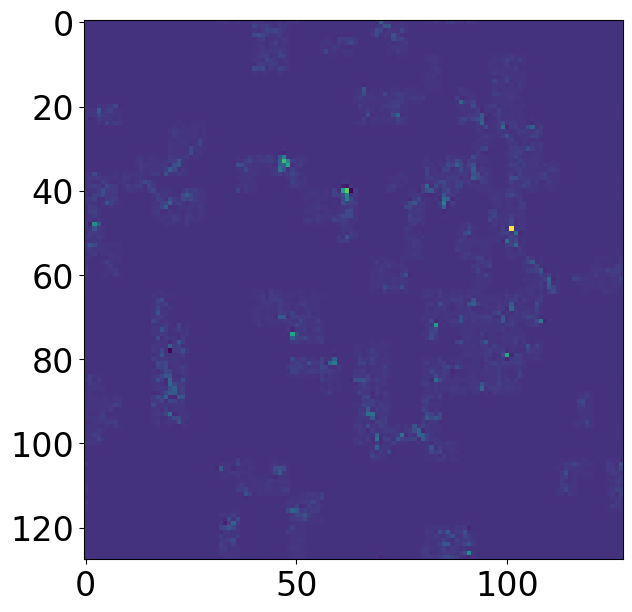

In [30]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as pl
pl.rc('text', usetex=False)
# Palatino
pl.rc('font', family='DejaVu Sans')


pl.figure()
pl.imshow(df_pylians[64,:,:])
pl.figure()
pl.imshow(one_plus_delta_nbkit.value[64,:,:] -1 )



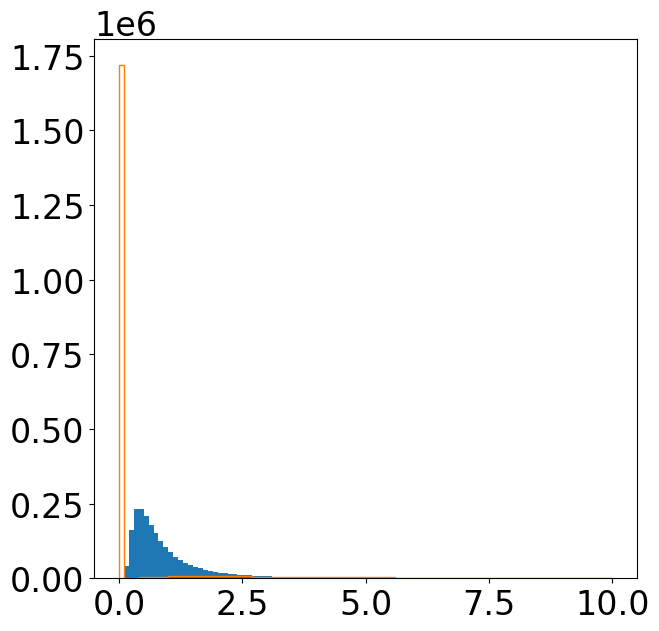

In [27]:
pl.figure()
_ = pl.hist(df_pylians.flatten() + 1., range=(0.,10), bins=100)
_ = pl.hist(one_plus_delta_nbkit.value.flatten(), range=(0.,10), histtype='step', bins=100)


In [11]:
one_plus_delta_nbkit.value.shape



(128, 128, 128)